# Analysis on Bank Marketing Dataset

Business Problem: Based on previous marketing campaigns, how should a financial instituion target audience for increased subscription for term deposit.

## Topic of Contents:
* [Understanding Datatypes and Basic Data Analysis](#first-bullet)
* [Basic Data Analysis](#second-bullet)
* [Effects of banking data on Term Deposit](#third-bullet)
* [Effect of Campaign on Term Deposit](#four-bullet)
* [Additional Attribute Effects](#five-bullet)
* [Data Preprocessing](#six-bullet)
* [Data Modelling](#seven-bullet)
* [Model Analysis](#eight-bullet)
* [Results](#nine-bullet)
* [Future Leads to Marketing Campaigns](#ten-bullet)


## Understanding Datatypes and Basic Data Analysis <a class="anchor" id="second-bullet"></a>

In [527]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [528]:
# set path for saving versions and images in specified format
path = './bank_marketing'
data_add = '/data'
report_add = '/reports'
figures_add = '/figures'

In [529]:
# loading data
df = pd.read_csv(path + data_add +'./raw/bank-additional-full.csv', delimiter = ';')

In [530]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [531]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [533]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [535]:
# using pandas profiling to create a HTMl report for each variable
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_zipped_file
profile = ProfileReport(
        df, title="Profile Report of the Raw UCI Bank Marketing Dataset", explorative=True
    )

In [547]:
profile.to_file(Path("uci_bank_marketing_report.html"))

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Inference: Looking at the profile report generated we gain general insights on class distribution of each variables and conclude skewness and imbalance in distribution present in the dataset.

## Visualizing the Data 

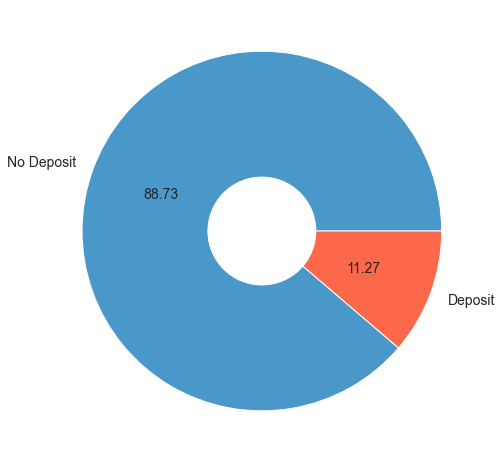

In [490]:
# looking at target variable: Deposit
labels = ['No Deposit','Deposit']
cmap1 = plt.cm.Blues
cmap2 = plt.cm.Reds
colors = [cmap1(0.6),cmap2(0.5)]
plt.pie(df["y"].value_counts(), labels = labels, colors = colors ,autopct="%.2f",textprops={'fontsize': 14})
# add a white circle at the center
my_circle=plt.Circle( (0,0), 0.3, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig(path + figures_add + '/piechart_target.png')
plt.show()

## Lets Explore the effect of education on Term deposit

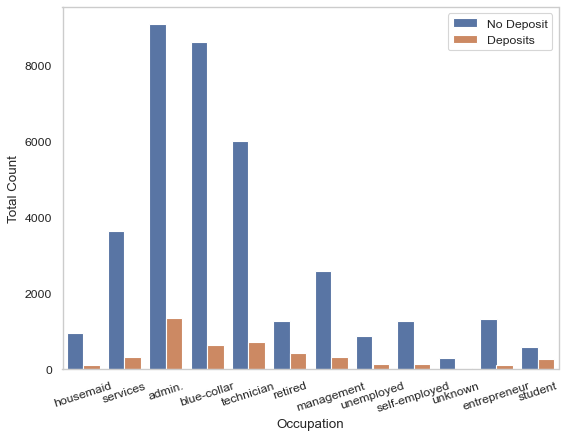

In [518]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6), dpi=80)
ax = sns.countplot(x = "job", hue = 'y', data = df)
ax.set(xlabel='Occupation', ylabel='Total Count')
plt.xticks(rotation=18)
plt.legend(["No Deposit", "Deposits"])
total = len(df)
plt.savefig(path + figures_add + '/Target_variables_distribution.png')
plt.grid(False)
plt.show()


In [578]:
job_groupby = df.groupby("job")
for k,v in job_groupby:
    print(k,"NO Deposit", round((v["y"].value_counts()["no"])/len(df),2)*100,"Yes Deposit",round((v["y"].value_counts()["yes"])/len(df),2)*100)


admin. NO Deposit 22.0 Yes Deposit 3.0
blue-collar NO Deposit 21.0 Yes Deposit 2.0
entrepreneur NO Deposit 3.0 Yes Deposit 0.0
housemaid NO Deposit 2.0 Yes Deposit 0.0
management NO Deposit 6.0 Yes Deposit 1.0
retired NO Deposit 3.0 Yes Deposit 1.0
self-employed NO Deposit 3.0 Yes Deposit 0.0
services NO Deposit 9.0 Yes Deposit 1.0
student NO Deposit 1.0 Yes Deposit 1.0
technician NO Deposit 15.0 Yes Deposit 2.0
unemployed NO Deposit 2.0 Yes Deposit 0.0
unknown NO Deposit 1.0 Yes Deposit 0.0


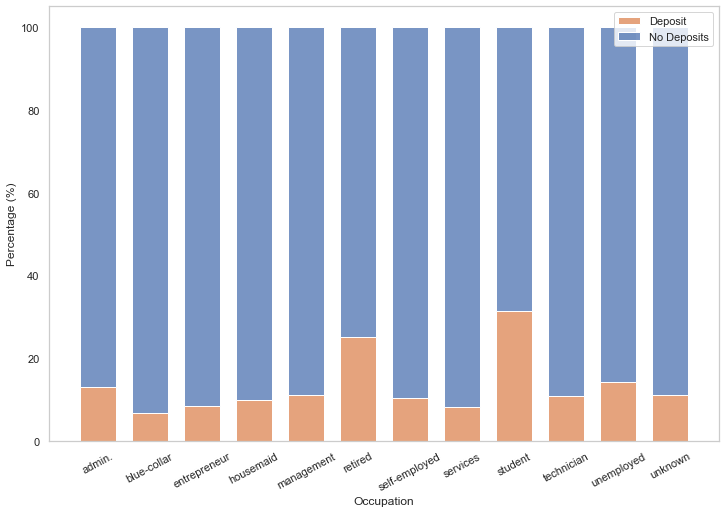

In [494]:
plot = df.groupby(['job'])['y'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
pd_df = plot.sort_values(['job']).reset_index(drop=True)
g = sns.histplot(x = 'job' , hue = 'y',weights= 'percentage',
             multiple = 'stack',data=plot,shrink = 0.7)
g.set(xlabel='Occupation', ylabel='Percentage (%)')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xticks(rotation=28)
plt.legend(["Deposit", "No Deposits"])
plt.grid(False)
plt.savefig(path + figures_add + '/Stacked_occupation.png')
plt.show()

In [579]:
job_groupby = df.groupby("job")
for k,v in job_groupby:
    print(k,"NO Deposit", ((v["y"].value_counts(normalize = True)["no"])/len(v))*100,"Yes Deposit",(v["y"].value_counts()["yes"])/len(v)*100)


admin. NO Deposit 0.008350359043343095 Yes Deposit 12.972558050278257
blue-collar NO Deposit 0.010061128596123644 Yes Deposit 6.894315971471795
entrepreneur NO Deposit 0.06283208549692065 Yes Deposit 8.516483516483516
housemaid NO Deposit 0.08490566037735849 Yes Deposit 10.0
management NO Deposit 0.0303633685841594 Yes Deposit 11.21751025991792
retired NO Deposit 0.04346944294213088 Yes Deposit 25.232558139534884
self-employed NO Deposit 0.06299396654485521 Yes Deposit 10.48557353976073
services NO Deposit 0.023144855116444457 Yes Deposit 8.138070042831949
student NO Deposit 0.07836734693877552 Yes Deposit 31.428571428571427
technician NO Deposit 0.013224671241117031 Yes Deposit 10.826041821147857
unemployed NO Deposit 0.08461421752272914 Yes Deposit 14.201183431952662
unknown NO Deposit 0.26905417814508725 Yes Deposit 11.212121212121213


<b>Inference</b>: Admin, Student and Retired people have better scope of signing Term Deposits.

## Lets check the effect of housing, loan and other banking attributes on the Term Deposit

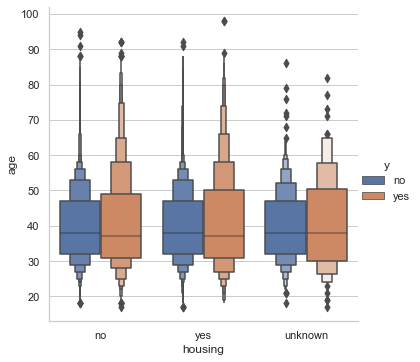

In [565]:
g = sns.catplot(x = "housing", y ='age', hue = 'y', kind = 'boxen', data = df)
plt.savefig(path + figures_add + '/box_housing_versus_age.png')
plt.show(g)

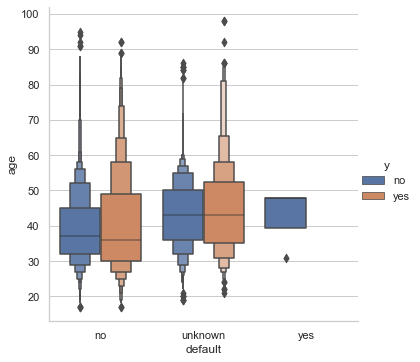

In [580]:
sns.catplot(x = "default", y ='age', hue = 'y', kind = 'boxen', data = df)

<b> Inference </b> Its clearly depicted from the graphs that people who have default are never able to sign term deposit which is actually true in real world.

## Effect of Previous Campaigns on Term Deposit <a class="anchor" id="four-bullet"></a>

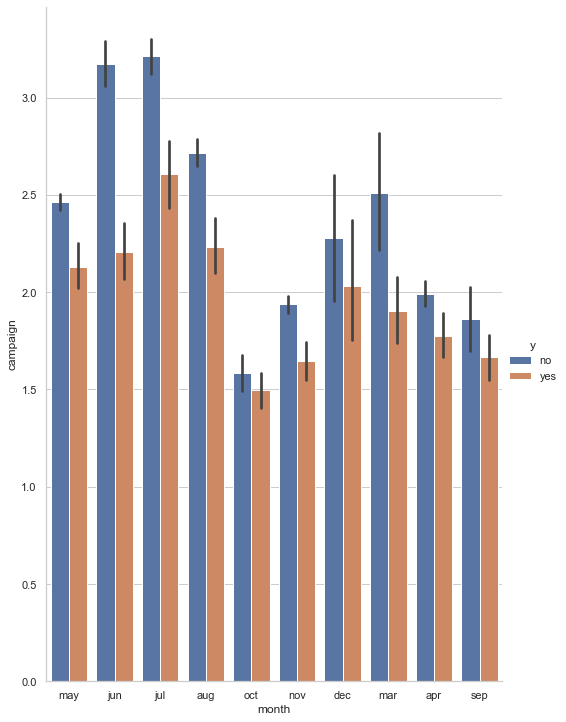

In [582]:
g = sns.catplot(x="month", y="campaign",
                hue="y",
                data=df, kind="bar",
                height=10, aspect=.7)

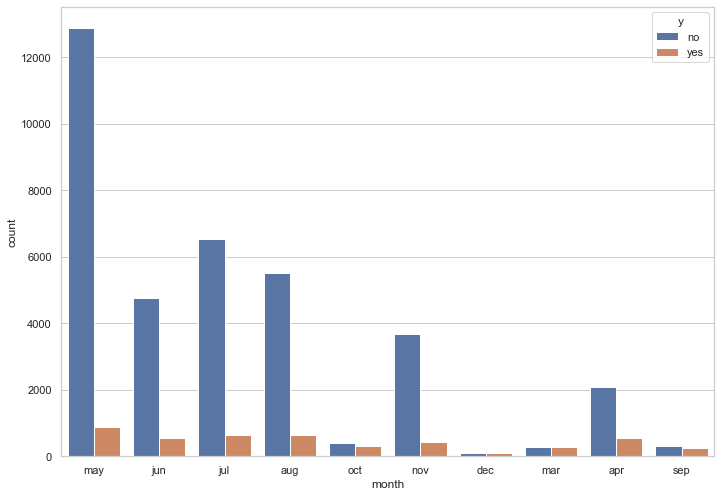

In [585]:
g = sns.countplot(x="month",
                hue="y",
                data=df
                )

In [592]:
# grouping all months together
month_groupby = df.groupby("month")
for k,v in month_groupby:
    print(k,"NO Deposit", (v["y"].value_counts()["no"])/len(v)*100,"Yes Deposit",(v["y"].value_counts()["yes"])/len(v)*100)


apr NO Deposit 79.52127659574468 Yes Deposit 20.47872340425532
aug NO Deposit 89.39786338620912 Yes Deposit 10.60213661379087
dec NO Deposit 51.098901098901095 Yes Deposit 48.9010989010989
jul NO Deposit 90.95344298856983 Yes Deposit 9.046557011430165
jun NO Deposit 89.48852952237684 Yes Deposit 10.511470477623167
mar NO Deposit 49.45054945054945 Yes Deposit 50.54945054945055
may NO Deposit 93.56525528360811 Yes Deposit 6.434744716391895
nov NO Deposit 89.85613265057303 Yes Deposit 10.14386734942697
oct NO Deposit 56.128133704735376 Yes Deposit 43.871866295264624
sep NO Deposit 55.08771929824562 Yes Deposit 44.91228070175438


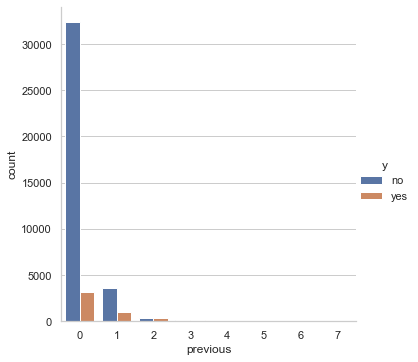

In [258]:
# check the effect of previous point of contact and its effect on term deposit
g = sns.catplot(x="previous",
                hue="y",kind = 'count',
                data=df)
plt.show()

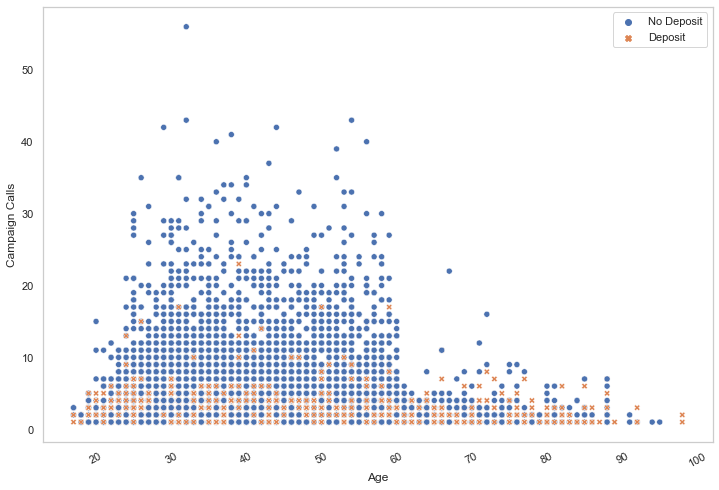

In [482]:
# check the effect of age distribution and reponse to campaign calls
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig = sns.scatterplot(data = df,x = "age",y = 'campaign', hue = "y", style = 'y')
plt.xticks(rotation=28)
legend_labels, _= fig.get_legend_handles_labels()
plt.legend(legend_labels, ['No Deposit','Deposit'], 
          bbox_to_anchor=(1,1), 
          title='')
fig.set(xlabel='Age', ylabel='Campaign Calls')
plt.grid(False)
plt.savefig(path + figures_add + '/Age_Campaign_Scatter.png')
plt.show()


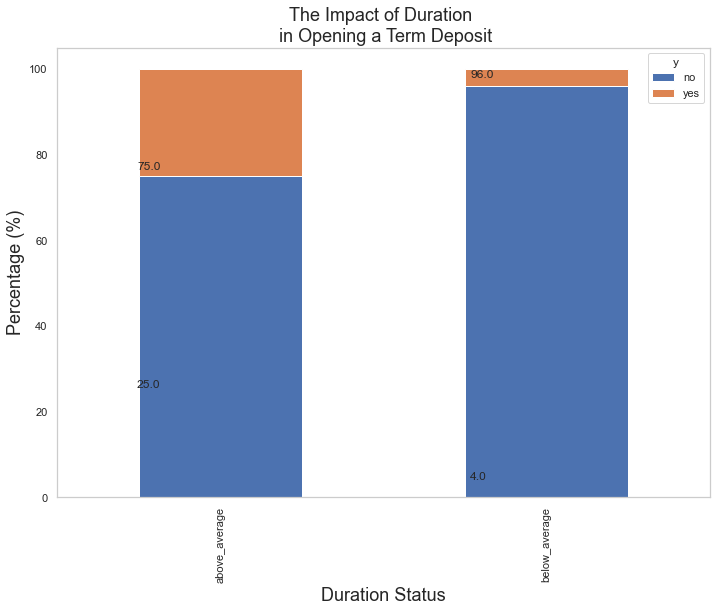

In [594]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=True)
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    
plt.grid(False)
plt.show()

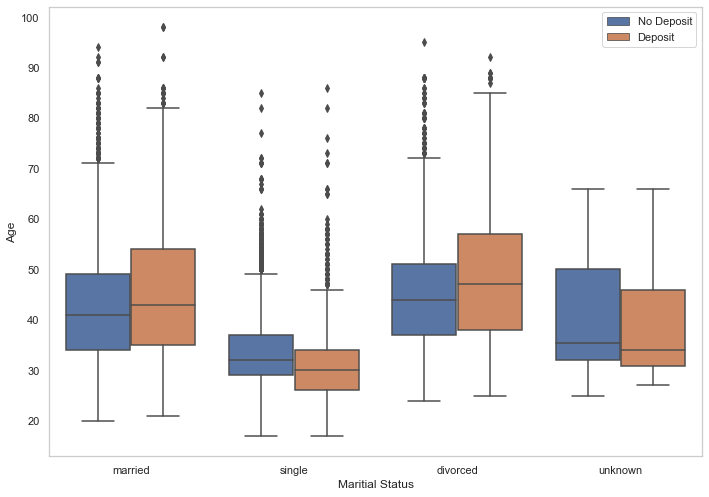

In [595]:
fig = sns.boxplot(x = df.marital, y = df.age, hue = df.y)
legend_labels, _= fig.get_legend_handles_labels()
plt.legend(legend_labels, ['No Deposit','Deposit'], 
          bbox_to_anchor=(1,1), 
          title='')
fig.set(xlabel='Maritial Status', ylabel='Age')
plt.grid(False)
plt.savefig(path + figures_add + '/Marital_Age.png')
plt.show()

<b> Inferences </b> 
- Months of March and and September and October seems to have great turn out ratio for "Yes/No Deposits" with may being the lowest month.
- People who were contacted in previous campaigns tend to have higher chances of enrolling into Term Deposit in future.
- Campaign calls should limit the frequency for each clients and not waste resources.
- Call duration should be kept below average which results in higher turn out ratio. 
- Age along with Maritial Status tends to play decision making role in population

## Lets investigate the characteristics of current subscribers

In [ ]:
yes_df = df.loc[df["y"]=='yes']

In [507]:
yes_df.previous.value_counts(normalize = True)

0    0.676940
1    0.208405
2    0.075431
3    0.027586
4    0.008190
5    0.002802
6    0.000647
Name: previous, dtype: float64

In [508]:
yes_df.pdays.value_counts(normalize = True)

999    0.791595
3      0.064224
6      0.062284
4      0.013578
7      0.008621
2      0.007974
9      0.007543
10     0.006466
5      0.006250
13     0.006034
12     0.005603
15     0.003448
11     0.003233
8      0.002586
14     0.002371
0      0.002155
1      0.001724
16     0.001293
18     0.000862
21     0.000431
22     0.000431
17     0.000431
26     0.000216
25     0.000216
27     0.000216
19     0.000216
Name: pdays, dtype: float64

In [506]:
yes_df.campaign.value_counts(normalize = True)

1     0.495690
2     0.260991
3     0.123707
4     0.053664
5     0.025862
6     0.016164
7     0.008190
9     0.003664
8     0.003664
10    0.002586
11    0.002586
17    0.000862
13    0.000862
12    0.000647
15    0.000431
14    0.000216
23    0.000216
Name: campaign, dtype: float64

In [435]:
yes_df.month.value_counts(normalize = True)

may    0.190948
aug    0.141164
jul    0.139871
jun    0.120474
apr    0.116164
nov    0.089655
oct    0.067888
mar    0.059483
sep    0.055172
dec    0.019181
Name: month, dtype: float64

In [433]:
yes_df.loan.value_counts(normalize = True)

no         0.829741
yes        0.147198
unknown    0.023060
Name: loan, dtype: float64

In [428]:
yes_df.education.value_counts(normalize = True)

university.degree      0.374784
high.school            0.239009
professional.course    0.133621
basic.9y               0.110776
basic.4y               0.100431
basic.6y               0.040517
illiterate             0.000862
Name: education, dtype: float64

In [429]:
yes_df.default.value_counts(normalize = True)

no         0.904526
unknown    0.095474
Name: default, dtype: float64

In [430]:
yes_df.housing.value_counts(normalize = True)

yes        0.540302
no         0.436638
unknown    0.023060
Name: housing, dtype: float64

In [431]:
yes_df['nr.employed'].value_counts(normalize = True)

5099.1    0.235345
5228.1    0.186638
5076.2    0.128017
5017.5    0.097845
4991.6    0.086853
5008.7    0.079526
4963.6    0.064871
5191.0    0.051724
5195.8    0.050000
5023.5    0.018966
5176.3    0.000216
Name: nr.employed, dtype: float64

In [432]:
yes_df.marital.value_counts(normalize = True)

married     0.545690
single      0.349138
divorced    0.102586
unknown     0.002586
Name: marital, dtype: float64

<b> Inferences from the current Term Deposit Subscribers</b>
- Married couples cover 54% of the maritial status sample
- people employed with 5099.1, 5228.1 and 5076.2 span most of the nr.employed field
- Housing does not play a significant role
- Education Level is an important factor 
- People who have outstanding loans will refrain from subscribing to Term Deposits

## Lets check the correlation between numerical features present in the dataset

In [599]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [600]:
corr = df.corr()

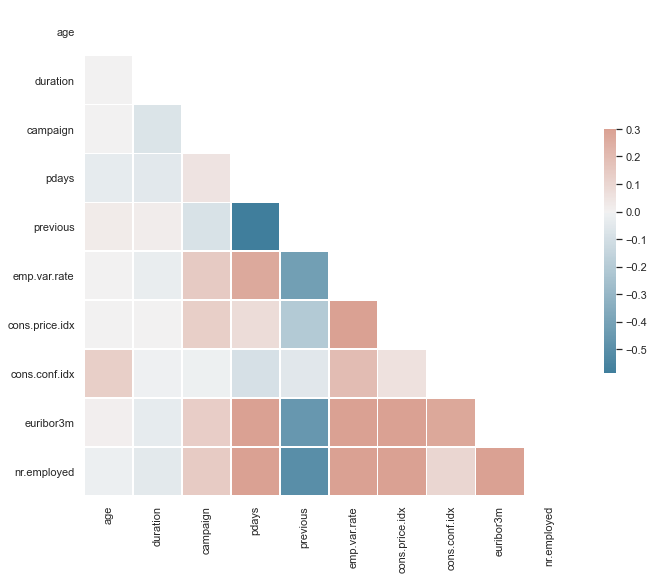

In [601]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<b> Inference </b>
- Attributes from Economics and employement are highly correlated. As these features have been updated in the latest version, they must play an important role in Term Deposit decision making and so we will consider them for our experiments.

End of Exploration. 
Lets dive into Data Imputation and Preprocessing in other notebook